# SRGAN
This notebook will contain demonstrations on how to train and use the SRGAN network. 

In [1]:
import imageio
import numpy as np
from __future__ import absolute_import
from skimage.transform import resize
from sklearn.datasets import fetch_olivetti_faces
import matplotlib.pyplot as plt
#from libs import srgan
#from libs import util
from libs.srgan import SRGAN
from libs.util import plot_test_images
#gan = SRGAN()

C:\Users\taz3wx\Conda\envs\myroot\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# 1. Loading Data
First we'll load some data to use

In [11]:
dataset = fetch_olivetti_faces("./data/olivetti_faces")
for i, img in enumerate(dataset.images):
    imageio.imwrite(f"./data/olivetti_faces/{i}.png", (img*255).astype(np.uint8))

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to ./data/olivetti_faces


## 1. Training

To train the SRGAN, we first instantiate the model

In [7]:
import os
os.environ['http_proxy'] = "http://127.0.0.1:3128" 
os.environ['https_proxy'] = "https://127.0.0.1:3128" 
gan = SRGAN()

574717952/574710816 [==============================] - 2122s 4us/step


And then perform training, which has options for regularly outputting the result on a few test images, and which regularly saves the model weights (in data/weights/ directory). You should change:

* datapath: to the directory containing all your training images
* test_images: to a list of image paths for testing during training

During training, check out the ./images/samples/ directory for test sample results. Use the rest of the parameters to play with batch_size, how often to save the weights and perform testing, and how often to print progress. Here we only train the model on the limited olivetty faces dataset, and only for a short amount of epochs

In [ ]:
gan.train(
    epochs=1000,
    dataname='olivetti',
    datapath='./data/olivetti_faces/',
    batch_size=1,
    test_images=[
        './data/olivetti_faces/0.png'
    ],
    test_frequency=100,
    test_path='./images/samples/',
    weight_path='./data/weights/',
    weight_frequency=100,
    print_frequency=100
)

>> Found 400 images in dataset


C:\Users\taz3wx\Conda\envs\myroot\lib\site-packages\keras\engine\training.py:479: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Epoch 0/1000 | Time: 239s
>> Generator: loss=1.478e+01, model_3_loss=3.227e-07, model_1_loss=1.478e+01
>> Discriminator: loss=4.607e-13, acc=1.000e+00



# 2. Testing
We have trained the network on imagenet for 100.000 iterations with a batch-size of 1. Below we show how to load these weights, and use them to create an SR version of a given image

In [13]:
gan.load_weights('./data/weights/imagenet_generator.h5', './data/weights/imagenet_discriminator.h5')

And then we can use the following utility function to take a test-image, super-resolve it, and then show the results

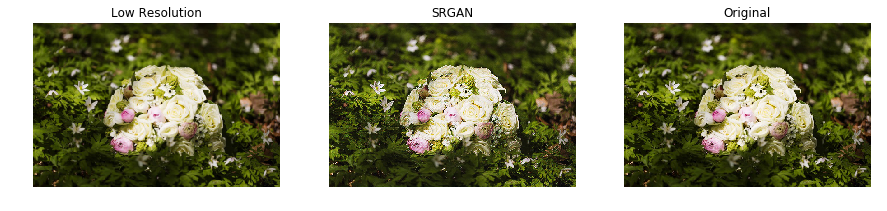

In [11]:
import imageio
import numpy as np
from __future__ import absolute_import
from skimage.transform import resize
from sklearn.datasets import fetch_olivetti_faces
import matplotlib.pyplot as plt
#from libs import srgan
#from libs import util
from libs.srgan import SRGAN
from libs.util import plot_test_images
gan = SRGAN()
gan.load_weights('./data/weights/imagenet_generator.h5', './data/weights/imagenet_discriminator.h5')
# Load image & scale it
img_hr = imageio.imread("./data/buket.jpg").astype(np.float) / 127.5 - 1

# Create a low-resolution version of it
lr_shape = (int(img_hr.shape[0]/2), int(img_hr.shape[1]/2))
img_lr = resize(img_hr, lr_shape, mode='constant')

# Predict high-resolution version (add batch dimension to image)
img_sr = gan.generator.predict(np.expand_dims(img_lr, 0))

# Remove batch dimension
img_sr = np.squeeze(img_sr, axis=0)

# Images and titles
images = {
    'Low Resolution': img_lr, 'SRGAN': img_sr, 'Original': img_hr
}

# Plot the images. Note: rescaling and using squeeze since we are getting batches of size 1                    
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, (title, img) in enumerate(images.items()):
    axes[i].imshow(0.5 * img + 0.5)
    #axes[i].imshow(img)
    axes[i].set_title(title)
    axes[i].axis('off')
plt.show()